In [149]:
import sys
sys.path.append("../")

from settings import FILE_DATA_EXEMPLE
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

img = cv2.imread(FILE_DATA_EXEMPLE)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = img[y:y+h, x:x+w]

    # show ROI
    path_name = os.path.join(DIR_DATA_LINES_KHALIL, 'segment_no_'+str(i)+'_expl.jpg')
    cv2.imwrite(path_name, roi)


In [150]:
def shift(img, m=-0.5):
    width, height = img.size
    xshift = abs(m)*width/20
    new_width = width + int(round(xshift))
    img = img.transform((new_width, height), Image.AFFINE,
            (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
    return(np.array(img)[:, 20:-20])

In [170]:
SEGMENTED_FILE = '../data/interim/LINES KHALIL/segment_no_5_expl.jpg'
image_proportion = cv2.imread(SEGMENTED_FILE)
image_proportion = cv2.cvtColor(image_proportion, cv2.COLOR_RGB2GRAY)

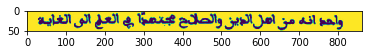

In [171]:
plt.imshow(image_proportion)

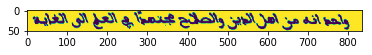

In [172]:
image_proportion = shift(Image.fromarray(image_proportion), -0.3)
plt.imshow(image_proportion)


In [173]:
hist = 255-image_proportion.mean(axis=0)
interruption = hist > 20

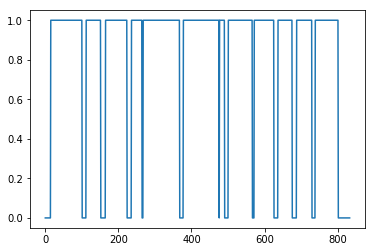

In [174]:
plt.plot(interruption)

In [175]:
mask = image_proportion * interruption

In [176]:
fg = cv2.bitwise_or(image_proportion, image_proportion, mask=mask)

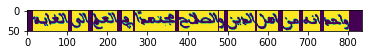

In [177]:
plt.imshow(fg)

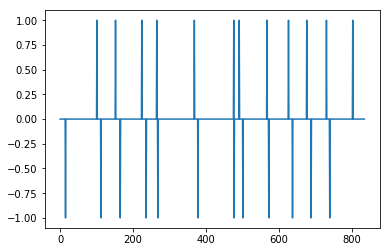

In [178]:
filter = np.array([-1, 1])
conv = np.convolve(interruption, filter)
plt.plot(conv)